# Modeller
All baselines are run on the same test set i.e. a subset of the original data set. 
The baselines included in this script are:
- Random model - choosing and ranking candidates randomly from the test set
- Plain Mergesort model - choosing and ranking candidates from the test set based on best grades in high school
- Mergesort w. gender accountability - choosing and ranking candidates based on high school grades with account equal gender representation (alternating between females and males in the ranking)
- Plain Xgboost regression model -
- Xgboost regression model without sensitive attributes - 

Fair model:
- Xgboost regression model account for diversity 

## Load packages

In [39]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import numpy as np
import random 
from sklearn.utils import shuffle

## Plots setup

In [40]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (14,5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

## Load dataset

In [41]:
# df = pd.read_csv("df_sum_score.csv")
df = pd.read_csv("X_test_raw.csv")
y_test = pd.read_csv("y_test_raw.csv")

In [42]:
df = pd.merge(df.copy(), y_test, on="Unnamed: 0") #Inner, right are default

# Mergesort

In [43]:
df_sort = df.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")

In [44]:
#Top 100
df_sort100 = df_sort[:100]
df_sort100

,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,COL_GRADE_AVG
1929,5129,100.000000,1,0,0,0,0,1,0,0,98.666667
1476,5673,94.000000,1,0,0,0,0,0,1,0,94.333333
3126,4900,93.666667,0,0,0,1,0,0,0,0,96.333333
2155,12328,93.333333,0,0,0,0,1,0,0,0,100.000000
3928,2607,93.333333,0,0,0,0,1,0,0,0,98.000000
...,...,...,...,...,...,...,...,...,...,...,...
522,10754,81.000000,1,0,0,0,0,0,1,0,94.333333
1442,10558,81.000000,0,0,0,1,0,0,0,0,96.000000
1991,8486,81.000000,0,0,0,0,1,0,0,0,66.333333
2136,11158,81.000000,0,0,0,0,0,1,0,0,97.666667


# Random model

In [45]:
#Top 100 for 1 Random sort
df_random100 = df.sample(n = 100, random_state=2)
df_random100

,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,COL_GRADE_AVG
3236,4802,81.333333,0,0,0,0,1,0,0,0,95.000000
1873,5221,60.000000,1,0,0,0,0,1,0,0,52.666667
1125,877,53.333333,0,0,0,1,0,0,0,0,37.666667
208,8758,55.333333,1,0,0,1,0,0,0,0,71.000000
689,7050,52.000000,0,0,0,1,0,0,0,0,45.000000
...,...,...,...,...,...,...,...,...,...,...,...
121,3402,58.333333,0,0,0,1,0,0,0,0,64.000000
2869,12097,62.000000,0,0,0,0,0,0,0,1,86.000000
2507,2701,58.000000,1,0,0,0,1,0,0,0,60.666667
45,119,50.666667,0,0,0,0,1,0,0,0,27.333333


## Mergesort w. gender accountability 
Choosing and ranking candidates based on high school grades with account equal gender representation (alternating between females and males in the ranking).

Merge sort for Female df and Male df and append and sort

In [46]:
#Top 100

def gender_mergesort(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER_bin == 0]
    df_F = df_temp[df_temp.GENDER_bin == 1]
    

    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        
gender_df100 = gender_mergesort(df)


In [47]:

#Gendersort all
def gender_mergesort_all(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER_bin == 0]
    df_F = df_temp[df_temp.GENDER_bin == 1]
    
    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        

gender_df = gender_mergesort_all(df)


In [48]:
gender_df100

,level_0,index,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,COL_GRADE_AVG
0,0,1929,5129,100.000000,1,0,0,0,0,1,0,0,98.666667
1,0,3126,4900,93.666667,0,0,0,1,0,0,0,0,96.333333
2,1,1476,5673,94.000000,1,0,0,0,0,0,1,0,94.333333
3,1,2155,12328,93.333333,0,0,0,0,1,0,0,0,100.000000
4,2,1257,7342,89.000000,1,0,0,0,1,0,0,0,98.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,3231,2679,79.666667,1,0,0,0,0,1,0,0,91.000000
96,48,436,7355,82.000000,0,0,0,0,0,1,0,0,88.333333
97,48,2457,8046,79.333333,1,0,0,0,1,0,0,0,94.333333
98,49,96,8024,79.000000,1,0,0,0,1,0,0,0,87.666667


## Create baseline plots

### Mergesort as function of n

In [49]:
# The mergesort as function of n
#new df with incremeanted hi avg 
df_avg = df_sort.copy()

#set the incremented hi avg as column
df_avg["incr_hi_mean"] = df_avg.HI_GRADE_AVG.expanding().mean()
# ovenstående var hvad vi gjorde f'r, men nu skal vi plotte på college grades i stedet for high school grades


In [50]:
# Først merge col tilbage på de sorterede df'er. 
# df_avg.merge(y_test[["Unnamed: 0", "COL_AVG_GRADE"]], how="left", on="Unnamed: 0")
#df_avg1 = pd.merge(df_avg, y_test, on="Unnamed: 0")


In [51]:

df_avg["incr_col_mean"] = df_avg.COL_GRADE_AVG.expanding().mean()
#evt.:

#check the incremented average grades
#df_avg["incr_hi_mean"] #index "2" er average af 100+97/2

#set cumsum of index to use for plot
# df_avg1["n_students"] = range(len(df))
df_avg["n_students"] = range(len(df_avg))

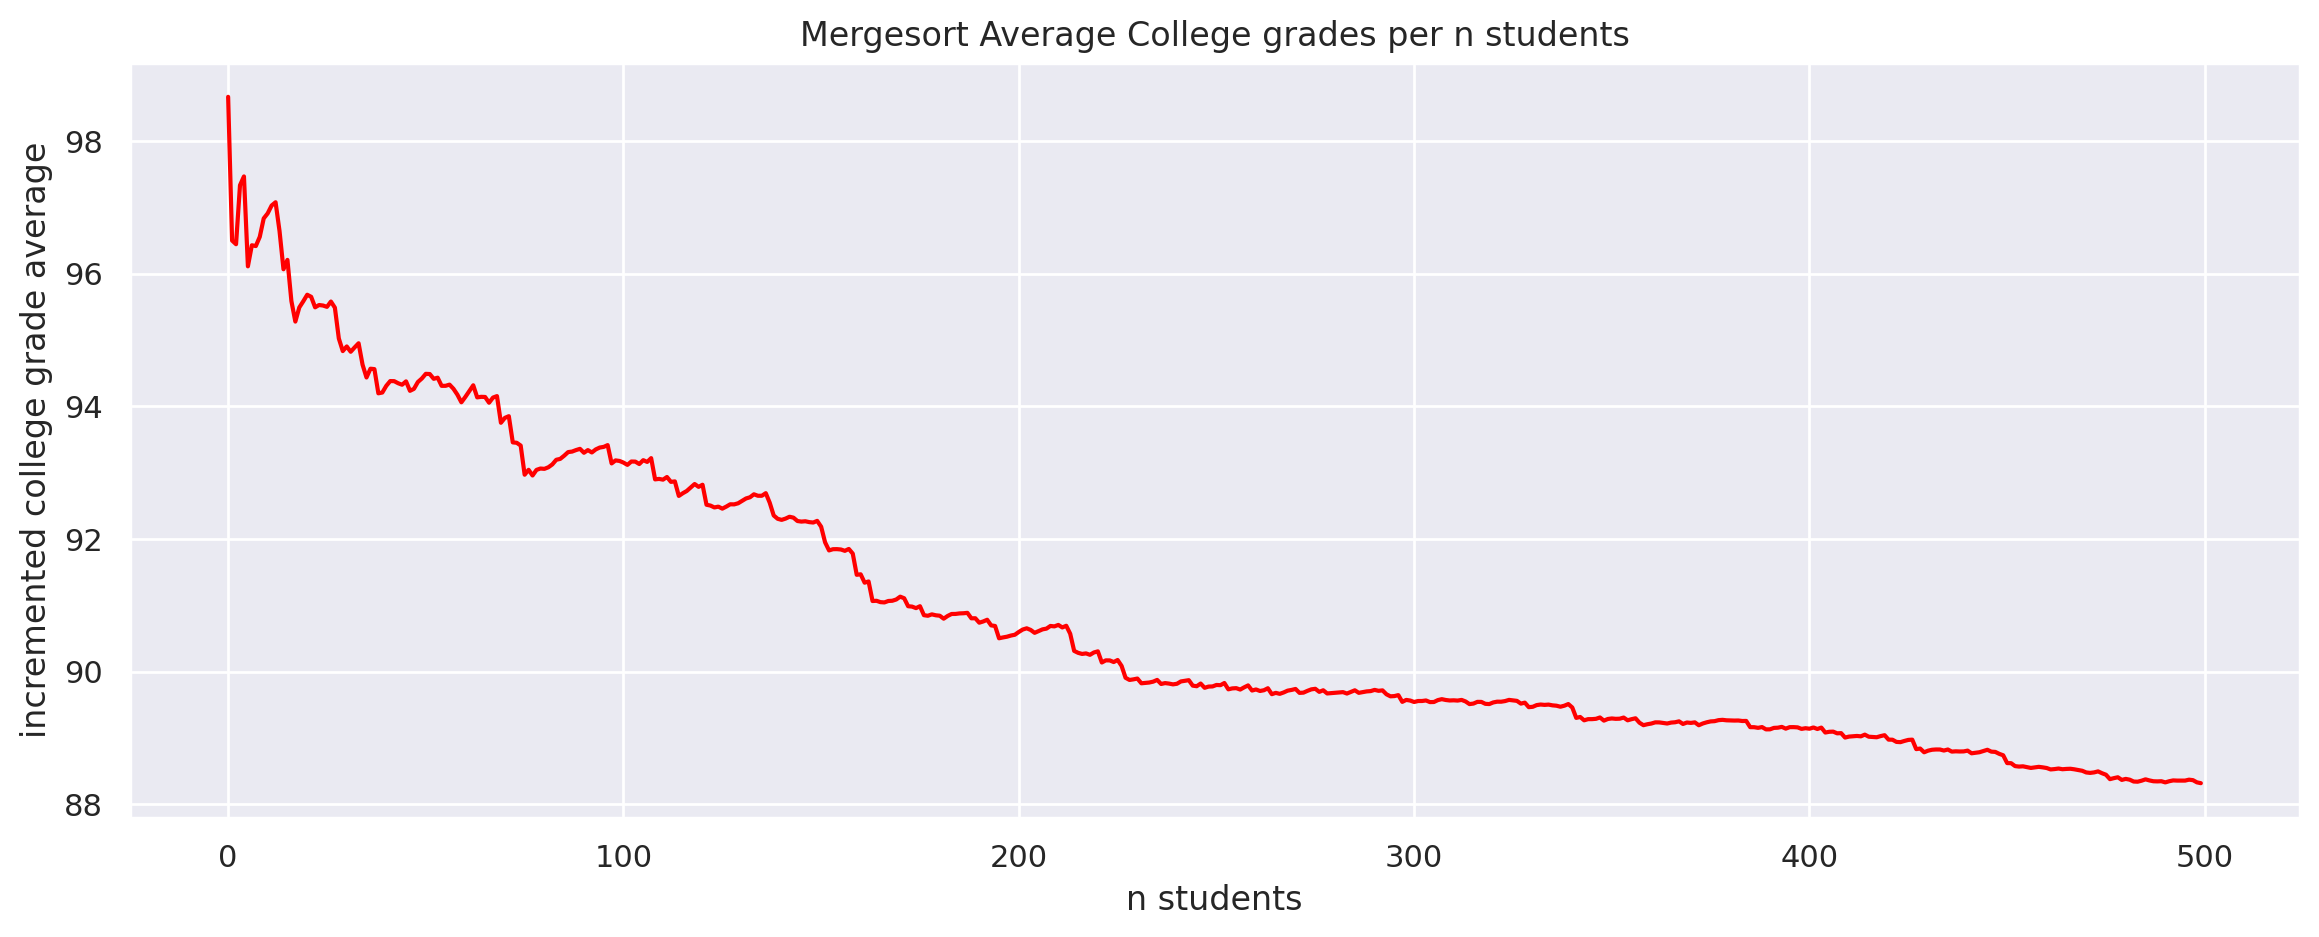

In [52]:
# Look of single lineplot of mergesort grades as function of n
# sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg, color="red").set_title("Mergesort Average HI grades per n students")
sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color="red").set_title("Mergesort Average College grades per n students")

plt.xlabel('n students')
plt.ylabel('incremented college grade average')
plt.show()

### Gendersort as function of n

In [53]:


# The gendersort as function of n
#set the incremented hi avg as column
gender_df["incr_col_mean"] = gender_df.COL_GRADE_AVG.expanding().mean()

#evt.:
#check the incremented average grades
#gender_df["incr_hi_mean"] #index "2" er average af 100+97/2


#cumsum of index to use for plot
gender_df["n_students"] = range(len(gender_df))

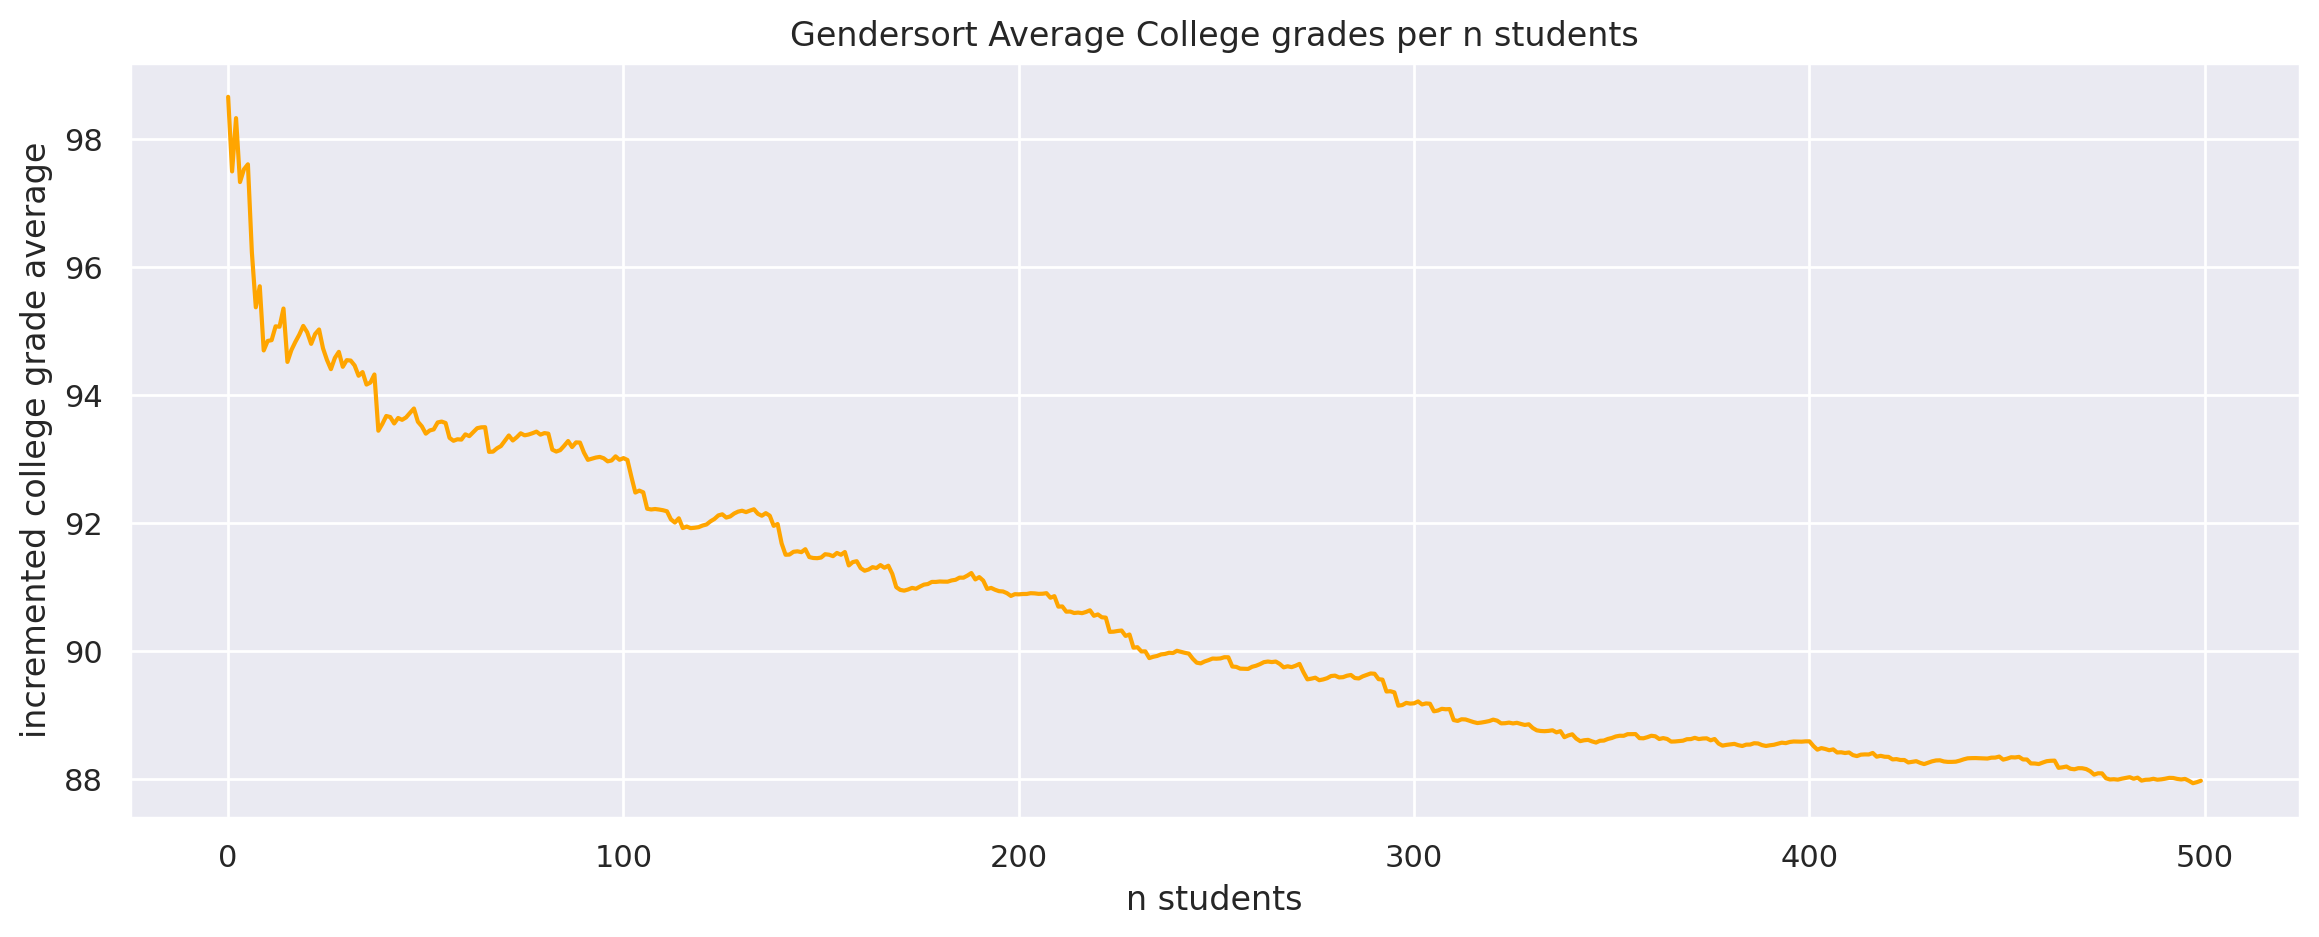

In [54]:
# Look of single lineplot of gendersort grades as function of n
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color="orange").set_title("Gendersort Average College grades per n students")
plt.xlabel('n students')
plt.ylabel('incremented college grade average')
plt.show()

### Random sort as function of n
2000 samples of random dataframes are generated and plotted with std. as error bars

In [55]:
#Random generated dfs
pd.options.mode.chained_assignment = None 

df_use = df.copy()
df_use = df_use[["Unnamed: 0","COL_GRADE_AVG", "GENDER_bin"]] #"STRATUM"

for j in range(1,2): #first make one random df that we can append the other random dfs to
    gen_state = random.seed(a=None) #random generator
    df_random1 = shuffle(df_use, random_state=gen_state) #shuffle the df with a random generator based on time
    df_random1["incr_col_mean"] = df_random1.COL_GRADE_AVG.expanding().mean()
    df_random1["n_students"] = range(len(df_random1))
    for i in range(1000):
        gen_state = random.seed(a=None)
        df_random2 = shuffle(df_use, random_state=gen_state)
        df_random2["incr_col_mean"] = df_random2.COL_GRADE_AVG.expanding().mean()
        df_random2["n_students"] = range(len(df_random2))
        df_random1 = df_random1.append(df_random2)

In [56]:
df_random1

,Unnamed: 0,COL_GRADE_AVG,GENDER_bin,incr_col_mean,n_students
2920,6897,71.666667,1,71.666667,0
2818,10316,18.666667,1,45.166667,1
2182,2132,82.333333,1,57.555556,2
1516,6571,40.000000,1,53.166667,3
1449,8701,49.333333,1,52.400000,4
...,...,...,...,...,...
3988,5102,37.666667,0,63.049446,4091
492,80,76.000000,0,63.052610,4092
691,2016,63.666667,0,63.052760,4093
700,3393,44.333333,0,63.048189,4094


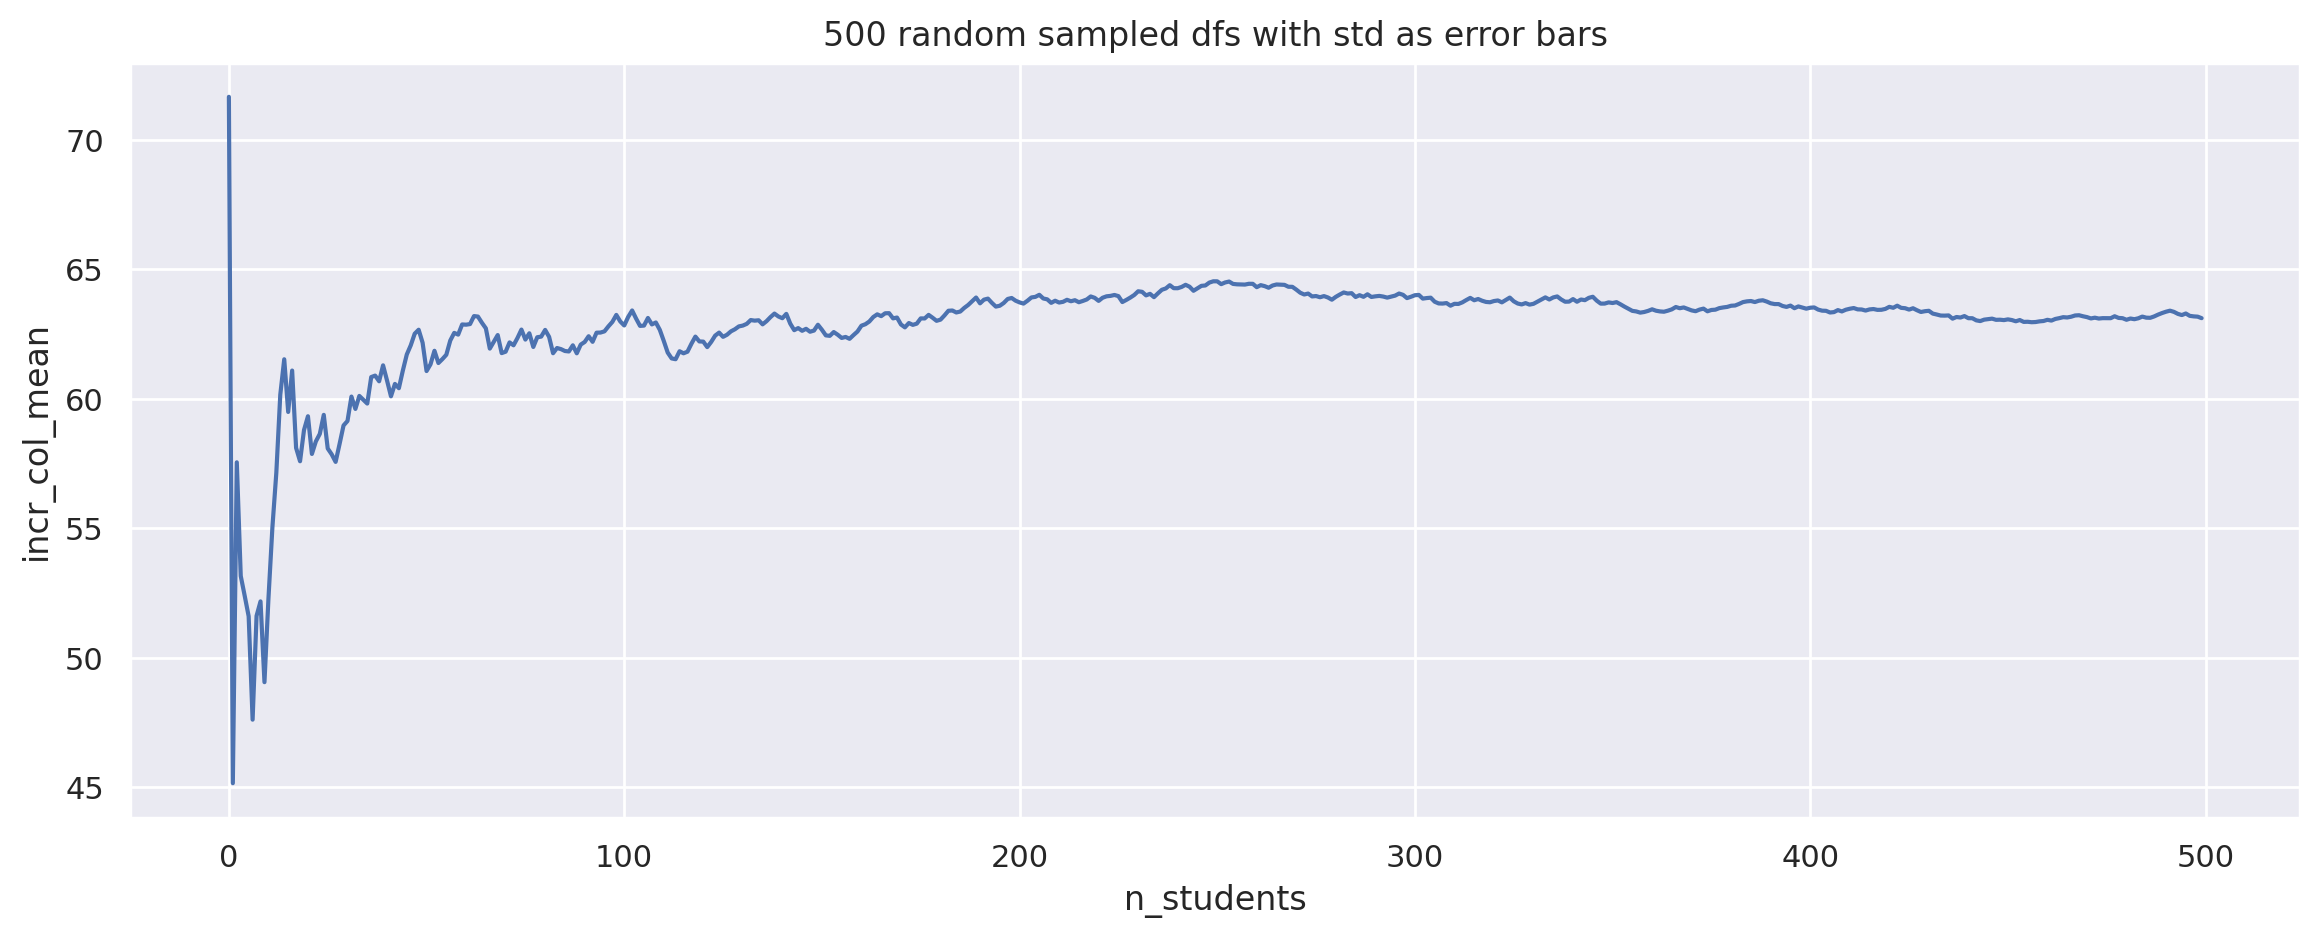

In [57]:
#First we plot the random grades per n students
# w 2000 samples

sns.lineplot(data=df_random1[:500], x="n_students", y="incr_col_mean", ci="sd")
plt.title("500 random sampled dfs with std as error bars")
plt.show()

### Random sort together with mergesort and gendersort as function of n

In [58]:
len(df_avg)

4096

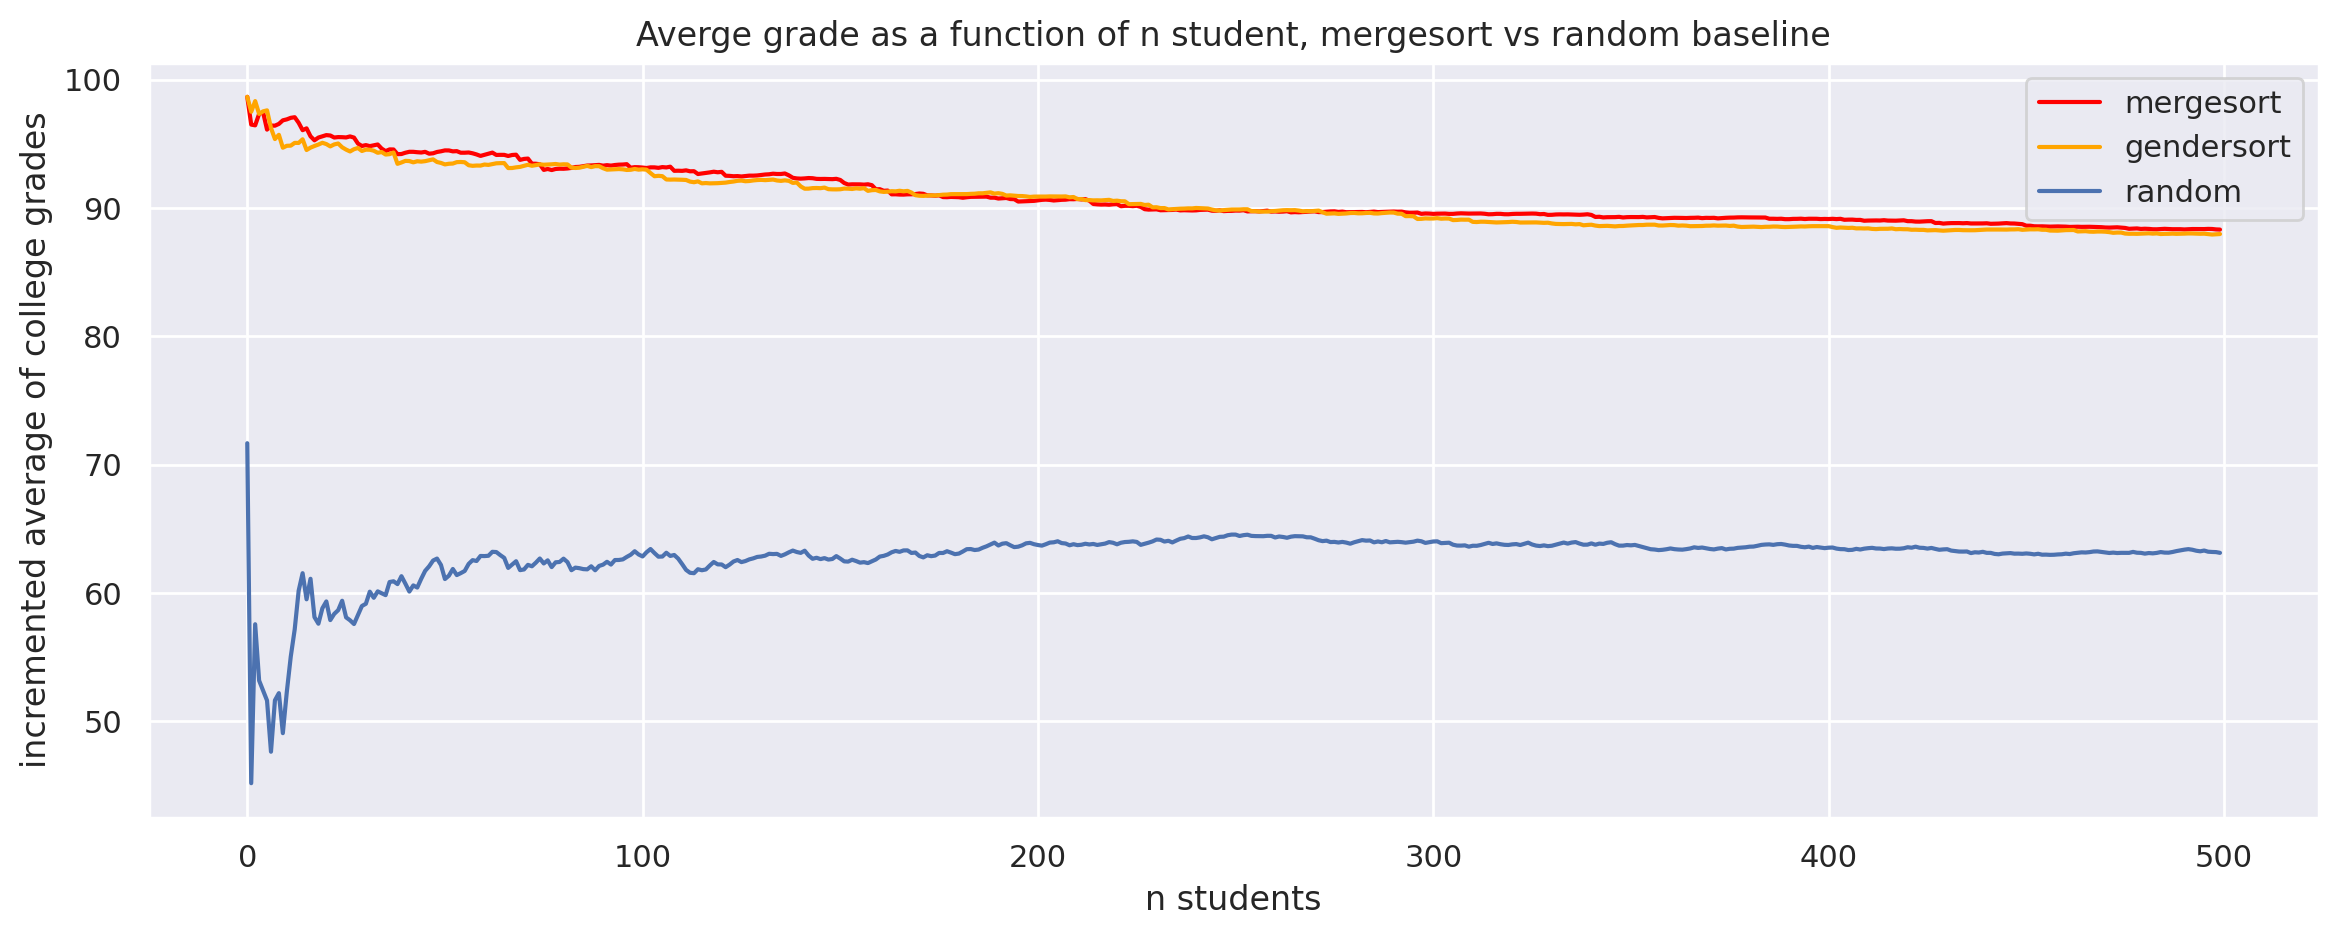

In [59]:
# The random grades per n students together with the gendersorted mergesort grades per n students

sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color='red')
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color ='orange')
sns.lineplot(data=df_random1[:500], x="n_students", y="incr_col_mean", ci="sd")
plt.xlabel('n students')
plt.ylabel('incremented average of college grades')
plt.title("Averge grade as a function of n student, mergesort vs random baseline")
plt.legend(["mergesort", "gendersort", "random"], loc ="upper right")
plt.show()

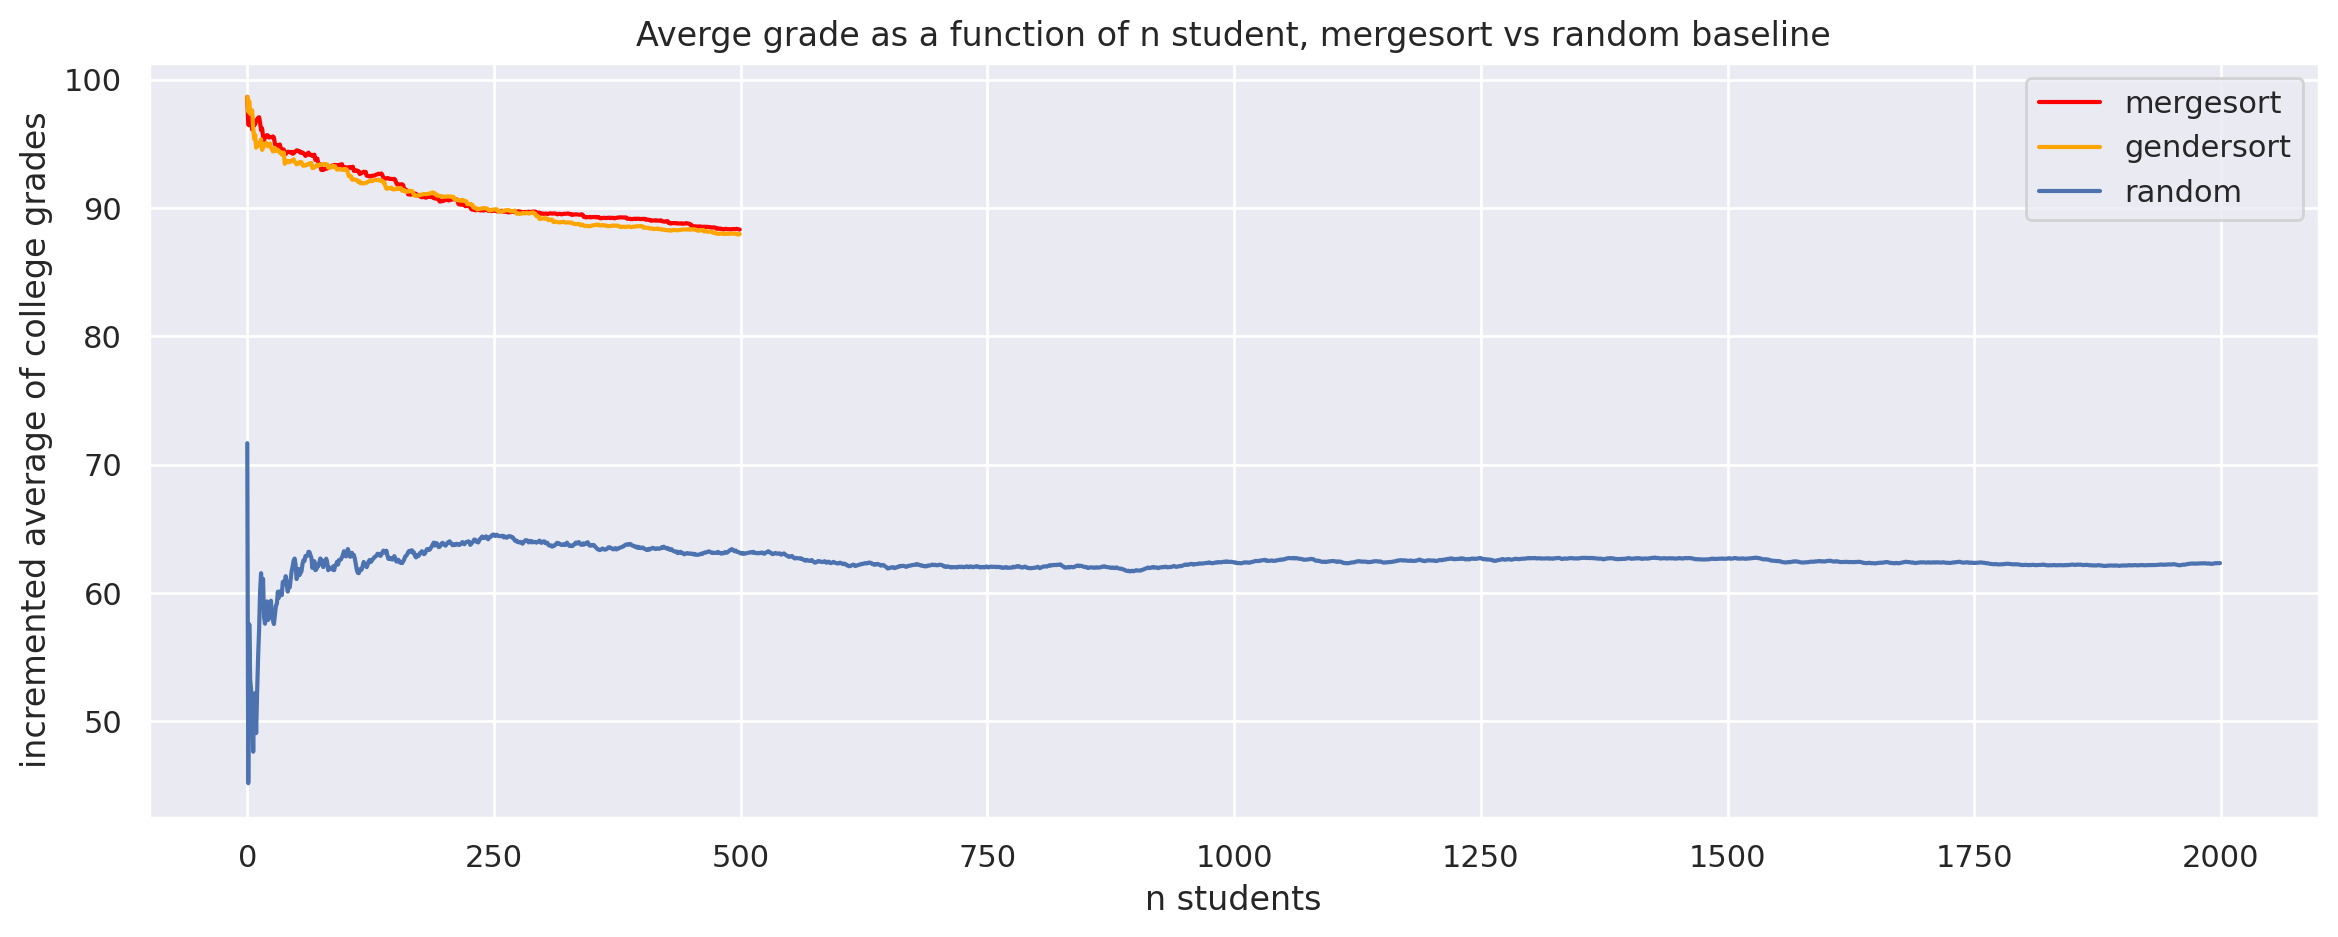

In [60]:
#deeper look into the plot, only first 2000 

sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color='red')
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color ='orange')
sns.lineplot(data=df_random1[:2000], x="n_students", y="incr_col_mean", ci="sd")
plt.xlabel('n students')
plt.ylabel('incremented average of college grades')
plt.title("Averge grade as a function of n student, mergesort vs random baseline")
plt.legend(["mergesort", "gendersort", "random"], loc ="upper right")
# Axes.set_ylim(bottom = 58, top=105)
plt.show()

## Entropy as a function of *n* for the different baselines
Using the Shannon entropy from https://en.wikipedia.org/wiki/Diversity_index:
$H^{\prime}=-\sum_{i=1}^{R} p_{i} \ln p_{i}$.

### Entropy of gender 

In this case *i* = {M, F}. I.e. $p_{i}$ is the ratio of either M or F in the given sample.
Log base 2 is used, as M and F are binary input, also described in (https://en.wikipedia.org/wiki/Diversity_index).


Afterwards entropy of gender-stratum pair is computed.

**Gender entropy in mergesorted df**

In [61]:
# Reset index of merge sort
df_sort = df_sort.reset_index()

In [62]:
#For each row incremented, get ratio of M and F
data_value_counts_gen = []
for i in range(1,len(df_sort)+1):
    data_value_counts_gen.append(np.array([df_sort["GENDER_bin"][:i].value_counts(normalize=True)]))

In [63]:
#Create new column with the ratios
df_sort["value_counts_col_GENDER"] = data_value_counts_gen

In [64]:
# Check if probabilities look correct
df_sort[["value_counts_col_GENDER", "GENDER_bin"]][:5] 

,value_counts_col_GENDER,GENDER_bin
0,[[1.0]],1
1,[[1.0]],1
2,"[[0.6666666666666666, 0.3333333333333333]]",0
3,"[[0.5, 0.5]]",0
4,"[[0.6, 0.4]]",0


In [65]:
#For each row incremented, get entropy 
data_entropy = []
for i in range(len(df_sort)):
    data_entropy.append(-(df_sort["value_counts_col_GENDER"][i]*np.log2(df_sort["value_counts_col_GENDER"][i])).sum())

In [70]:
#Create new column with the entropy
df_sort["entropy_col_GENDER"] = data_entropy

In [71]:
# Check if entropy looks correct
print(-2*np.sum(0.5*np.log2(0.5)))
df_sort[["GENDER_bin", "value_counts_col_GENDER", "entropy_col_GENDER"]]

1.0


,GENDER_bin,value_counts_col_GENDER,entropy_col_GENDER
0,1,[[1.0]],-0.000000
1,1,[[1.0]],-0.000000
2,0,"[[0.6666666666666666, 0.3333333333333333]]",0.918296
3,0,"[[0.5, 0.5]]",1.000000
4,0,"[[0.6, 0.4]]",0.970951
...,...,...,...
4091,0,"[[0.591642228739003, 0.4083577712609971]]",0.975630
4092,0,"[[0.5917419985340826, 0.4082580014659174]]",0.975577
4093,1,"[[0.5915974596971177, 0.40840254030288226]]",0.975654
4094,0,"[[0.5916971916971917, 0.4083028083028083]]",0.975601


**Gender entropy in gendersorted df**

In [72]:
#Value counts/ratio per row

data_value_counts_GENDER = []
for i in range(1,len(gender_df)+1):
    data_value_counts_GENDER.append(np.array([gender_df["GENDER_bin"][:i].value_counts(normalize=True)]))

gender_df["value_counts_col_GENDER"] = data_value_counts_GENDER

#Entropy for each row

data_entropy_GENDER = []
for i in range(len(df_sort)):
    data_entropy_GENDER.append(-(gender_df["value_counts_col_GENDER"][i]*np.log2(gender_df["value_counts_col_GENDER"][i])).sum())    

gender_df["entropy_col_GENDER"] = data_entropy_GENDER


### Plot of gender entropy of mergesorted and gendersorted df

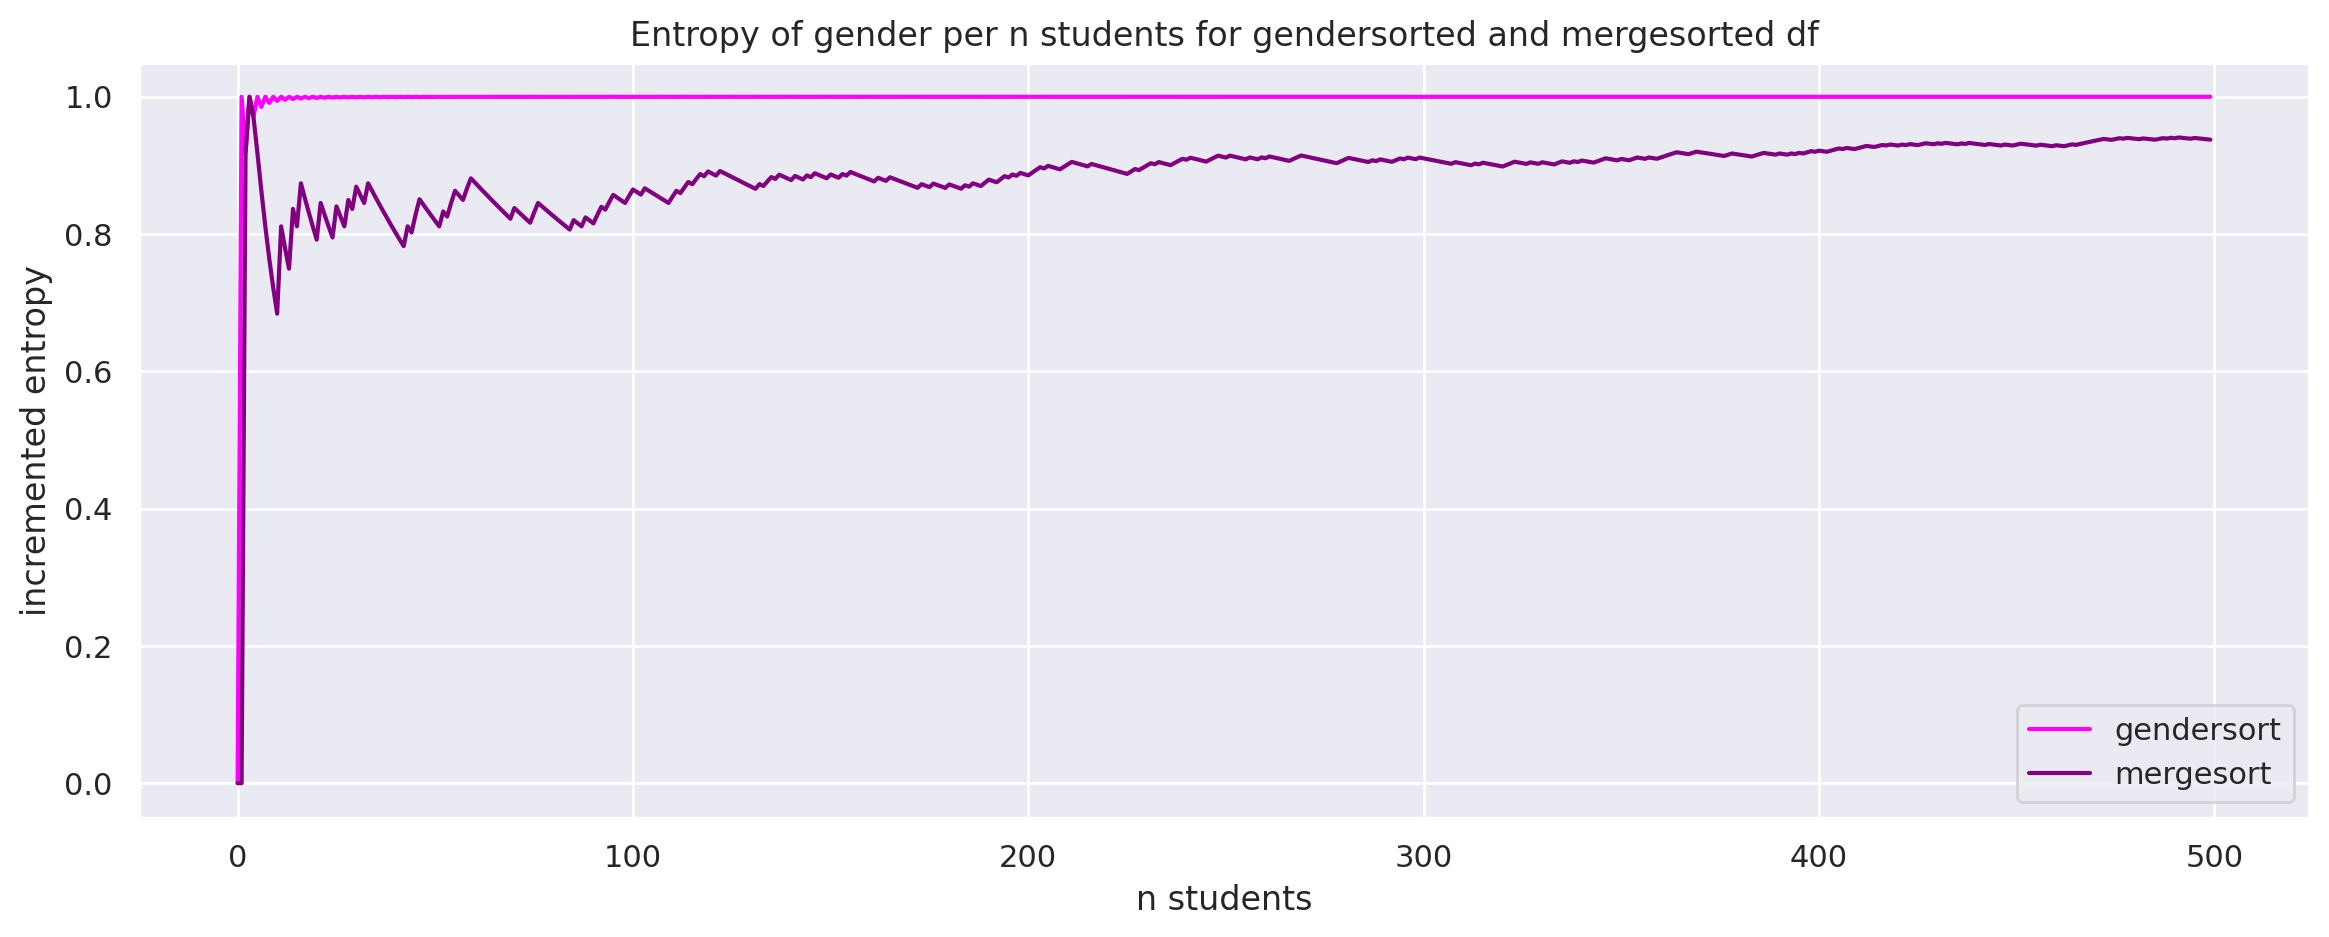

In [73]:
#ENTROPY GENDER gender_sort and merge_sort

gender_df["n_students"] = range(len(gender_df))
df_sort["n_students"] = range(len(df_sort)) #apply new column of cumsum+1


# gendersort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=gender_df[:500], color="magenta").set_title("Entropy of gender per n students for gendersorted and mergesorted df")

# mergesort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_sort[:500], color="purple")

plt.xlabel('n students')
plt.ylabel('incremented entropy')

plt.legend(["gendersort", "mergesort"], loc ="lower right")

plt.show()

### Entropy of gender-startum pairs
In this case *i* = {1_0, 1_1, 2_0, 2_1, ... , 6_0, 6_1}. We call each entry for a sg-par. E.g. 1_0 represents Stratum 1, Gender F = 0. 6_1 represents Stratum 6, Gender M = 1. 
I.e. $p_{i}$ is the ratio of each sg-pair in the given sample. The entropy is the summation over the number of sg-pair present in the sample. 
Log base e (natural) is used, as each entry is a natural number. 


**Gender-stratum entropy in mergesorted df**

In [75]:
df_sort

,index,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,COL_GRADE_AVG,value_counts_col_GENDER,entropy_col,n_students,entropy_col_GENDER
0,1929,5129,100.000000,1,0,0,0,0,1,0,0,98.666667,[[1.0]],-0.000000,0,-0.000000
1,1476,5673,94.000000,1,0,0,0,0,0,1,0,94.333333,[[1.0]],-0.000000,1,-0.000000
2,3126,4900,93.666667,0,0,0,1,0,0,0,0,96.333333,"[[0.6666666666666666, 0.3333333333333333]]",0.918296,2,0.918296
3,2155,12328,93.333333,0,0,0,0,1,0,0,0,100.000000,"[[0.5, 0.5]]",1.000000,3,1.000000
4,3928,2607,93.333333,0,0,0,0,1,0,0,0,98.000000,"[[0.6, 0.4]]",0.970951,4,0.970951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,3531,1909,36.333333,0,0,1,0,0,0,0,0,7.000000,"[[0.591642228739003, 0.4083577712609971]]",0.975630,4091,0.975630
4092,3720,7166,36.333333,0,0,0,1,0,0,0,0,12.666667,"[[0.5917419985340826, 0.4082580014659174]]",0.975577,4092,0.975577
4093,61,3061,35.333333,1,0,0,1,0,0,0,0,6.333333,"[[0.5915974596971177, 0.40840254030288226]]",0.975654,4093,0.975654
4094,4004,6366,35.333333,0,0,1,0,0,0,0,0,7.333333,"[[0.5916971916971917, 0.4083028083028083]]",0.975601,4094,0.975601


In [79]:
# TODO vær opmærksom på at denne df_sort har binary stratum og derfor kan nedenstående kode ikke køres. Skal laves på tidligere version af data. 

In [78]:
# Function creating gender-startum pair = sg_pair
def sgpair_func(gen, strat):
    #combines startum number and binary gender number in a string:
    for i in range(1,7):
        if gen==1 and strat == "Stratum_{}".format(i):
            return "{}_1".format(i)
        elif gen==0 and strat == "Stratum_{}".format(i):
            return "{}_0".format(i)
        else:
            None

#stratum gender pair column
df_sort["sg_pair"] = df_sort.apply(lambda x: sgpair_func(x['GENDER_bin'], x['STRATUM']), axis=1)



#For each row incremented, get ratio of sg-pair(s) and add to df
data_value_counts = []
for i in range(1,len(df_sort)+1):
    data_value_counts.append(np.array([df_sort["sg_pair"][:i].value_counts(normalize=True)]))

df_sort["value_counts_col"] = data_value_counts

#For each row incremented, get entropy of sg-pair(s) and add to df
data_entropy = []
for i in range(len(df_sort)):
    data_entropy.append(-(df_sort["value_counts_col"][i]*np.log10(df_sort["value_counts_col"][i])).sum())

df_sort["entropy_col"] = data_entropy

KeyError: 'STRATUM'

In [80]:
# Check if entropy looks correct
print(-2*np.sum(0.5*np.log10(0.5)))
print(-2*np.sum(0.5*np.log10(0.5)))

df_sort[["GENDER", "value_counts_col", "entropy_col"]]

0.3010299956639812
0.3010299956639812


KeyError: "['value_counts_col', 'GENDER'] not in index"

**Gender-stratum entropy in gendersorted df**

In [81]:
gender_df

,level_0,index,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,COL_GRADE_AVG,incr_col_mean,n_students,value_counts_col_GENDER,entropy_col_GENDER
0,0,1929,5129,100.000000,1,0,0,0,0,1,0,0,98.666667,98.666667,0,[[1.0]],-0.000000
1,0,3126,4900,93.666667,0,0,0,1,0,0,0,0,96.333333,97.500000,1,"[[0.5, 0.5]]",1.000000
2,1,2155,12328,93.333333,0,0,0,0,1,0,0,0,100.000000,98.333333,2,"[[0.6666666666666666, 0.3333333333333333]]",0.918296
3,1,1476,5673,94.000000,1,0,0,0,0,0,1,0,94.333333,97.333333,3,"[[0.5, 0.5]]",1.000000
4,2,1257,7342,89.000000,1,0,0,0,1,0,0,0,98.333333,97.533333,4,"[[0.6, 0.4]]",0.970951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,2419,2177,8091,37.000000,0,0,0,0,1,0,0,0,22.000000,63.094901,4091,"[[0.5913978494623656, 0.40860215053763443]]",0.975761
4092,2420,3531,1909,36.333333,0,0,1,0,0,0,0,0,7.000000,63.081196,4092,"[[0.591497678964085, 0.408502321035915]]",0.975707
4093,2421,3720,7166,36.333333,0,0,0,1,0,0,0,0,12.666667,63.068881,4093,"[[0.5915974596971177, 0.40840254030288226]]",0.975654
4094,2422,4004,6366,35.333333,0,0,1,0,0,0,0,0,7.333333,63.055271,4094,"[[0.5916971916971917, 0.4083028083028083]]",0.975601


In [ ]:
# Function creating gender-startum pair = sg_pair
def sgpair_func(gen, strat):
    #combines startum number and binary gender number in a string:
    for i in range(1,7):
        if gen==1 and strat == "Stratum_{}".format(i):
            return "{}_1".format(i)
        elif gen==0 and strat == "Stratum_{}".format(i):
            return "{}_0".format(i)
        else:
            None

#stratum gender pair column
gender_df["sg_pair"] = gender_df.apply(lambda x: sgpair_func(x['GENDER_bin'], x['STRATUM']), axis=1)

#For each row incremented, get ratio of sg-pair(s) and add to df
data_value_counts = []
for i in range(1,len(gender_df)+1):
    data_value_counts.append(np.array([gender_df["sg_pair"][:i].value_counts(normalize=True)]))

gender_df["value_counts_col"] = data_value_counts

#For each row incremented, get entropy of sg-pair(s) and add to df
data_entropy = []
for i in range(len(gender_df)):
    data_entropy.append(-(gender_df["value_counts_col"][i]*np.log10(gender_df["value_counts_col"][i])).sum())


gender_df["entropy_col"] = data_entropy

In [ ]:
# Check if entropy looks correct
print(-2*np.sum(0.5*np.log10(0.5)))
print(-2*np.sum(0.5*np.log10(0.5)))

gender_df[["GENDER", "value_counts_col", "entropy_col"]]

### Plot of gender-stratum entropy of mergesorted and gendersorted df

In [ ]:
#ENTROPY GENDER gender_sort and merge_sort

# Add new column of cumsum+1 to use for x-axis
gender_df["n_students"] = range(len(gender_df))
df_sort["n_students"] = range(len(df_sort)) 


# gendersort entropy of gender
sns.lineplot(x="n_students", y="entropy_col", data=gender_df, color="green").set_title("Entropy of gender-stratum pair per n students for gendersorted and mergesorted df")

# mergesort entropy of gender
sns.lineplot(x="n_students", y="entropy_col", data=df_sort, color="darkblue")

plt.xlabel('n students')
plt.ylabel('incremented entropy')

plt.legend(["gendersort", "mergesort"], loc ="lower right")

plt.show()

# Entropy of xgboost
## - Without senstitive attributes

## - With sensitive attributes

Data to use

In [82]:
#Dataframe to use
df_xgb_vanilla = pd.read_csv("samlet_preds_index_vanilla-kopi.csv")
df_xgb_vanilla = df_xgb_vanilla.rename(columns={"Gender_bins":"GENDER_bin"}) 


In [83]:
#Create dataframe to use
df_xgb_wo = pd.read_csv("samlet_preds_index_without_sensitive-kopi.csv")
df_xgb_wo = df_xgb_wo.merge(df_xgb_vanilla[["GENDER_bin", "Idx"]], on="Idx")


#df_xgb_wo["GENDER_bin"] = X_test.GENDER_bin.to_numpy()
#Gather with Gender_bin 

In [84]:
df_xgb_vanilla[:5]

,Unnamed: 0,Idx,GENDER_bin,Preds
0,2808,7126,0,93.661713
1,3034,7333,0,93.661713
2,2787,5248,0,93.661713
3,523,6236,0,93.661713
4,3660,7493,0,93.661713


In [85]:
df_xgb_wo

,Unnamed: 0,Idx,Preds,GENDER_bin
0,3746,7490,93.462349,1
1,1929,5129,93.462349,1
2,3126,4900,93.462349,0
3,1423,8982,93.462349,0
4,1777,11714,93.462349,0
...,...,...,...,...
4091,1885,6781,22.206335,0
4092,306,10129,22.206335,1
4093,2121,3922,22.206335,0
4094,1949,10156,22.206335,0


  value_counts_col_GENDER  GENDER_bin
0                 [[1.0]]           0
1                 [[1.0]]           0
2                 [[1.0]]           0
3                 [[1.0]]           0
4                 [[1.0]]           0
                      value_counts_col_GENDER  GENDER_bin
0                                     [[1.0]]           1
1                                     [[1.0]]           1
2  [[0.6666666666666666, 0.3333333333333333]]           0
3                                [[0.5, 0.5]]           0
4                                [[0.6, 0.4]]           0


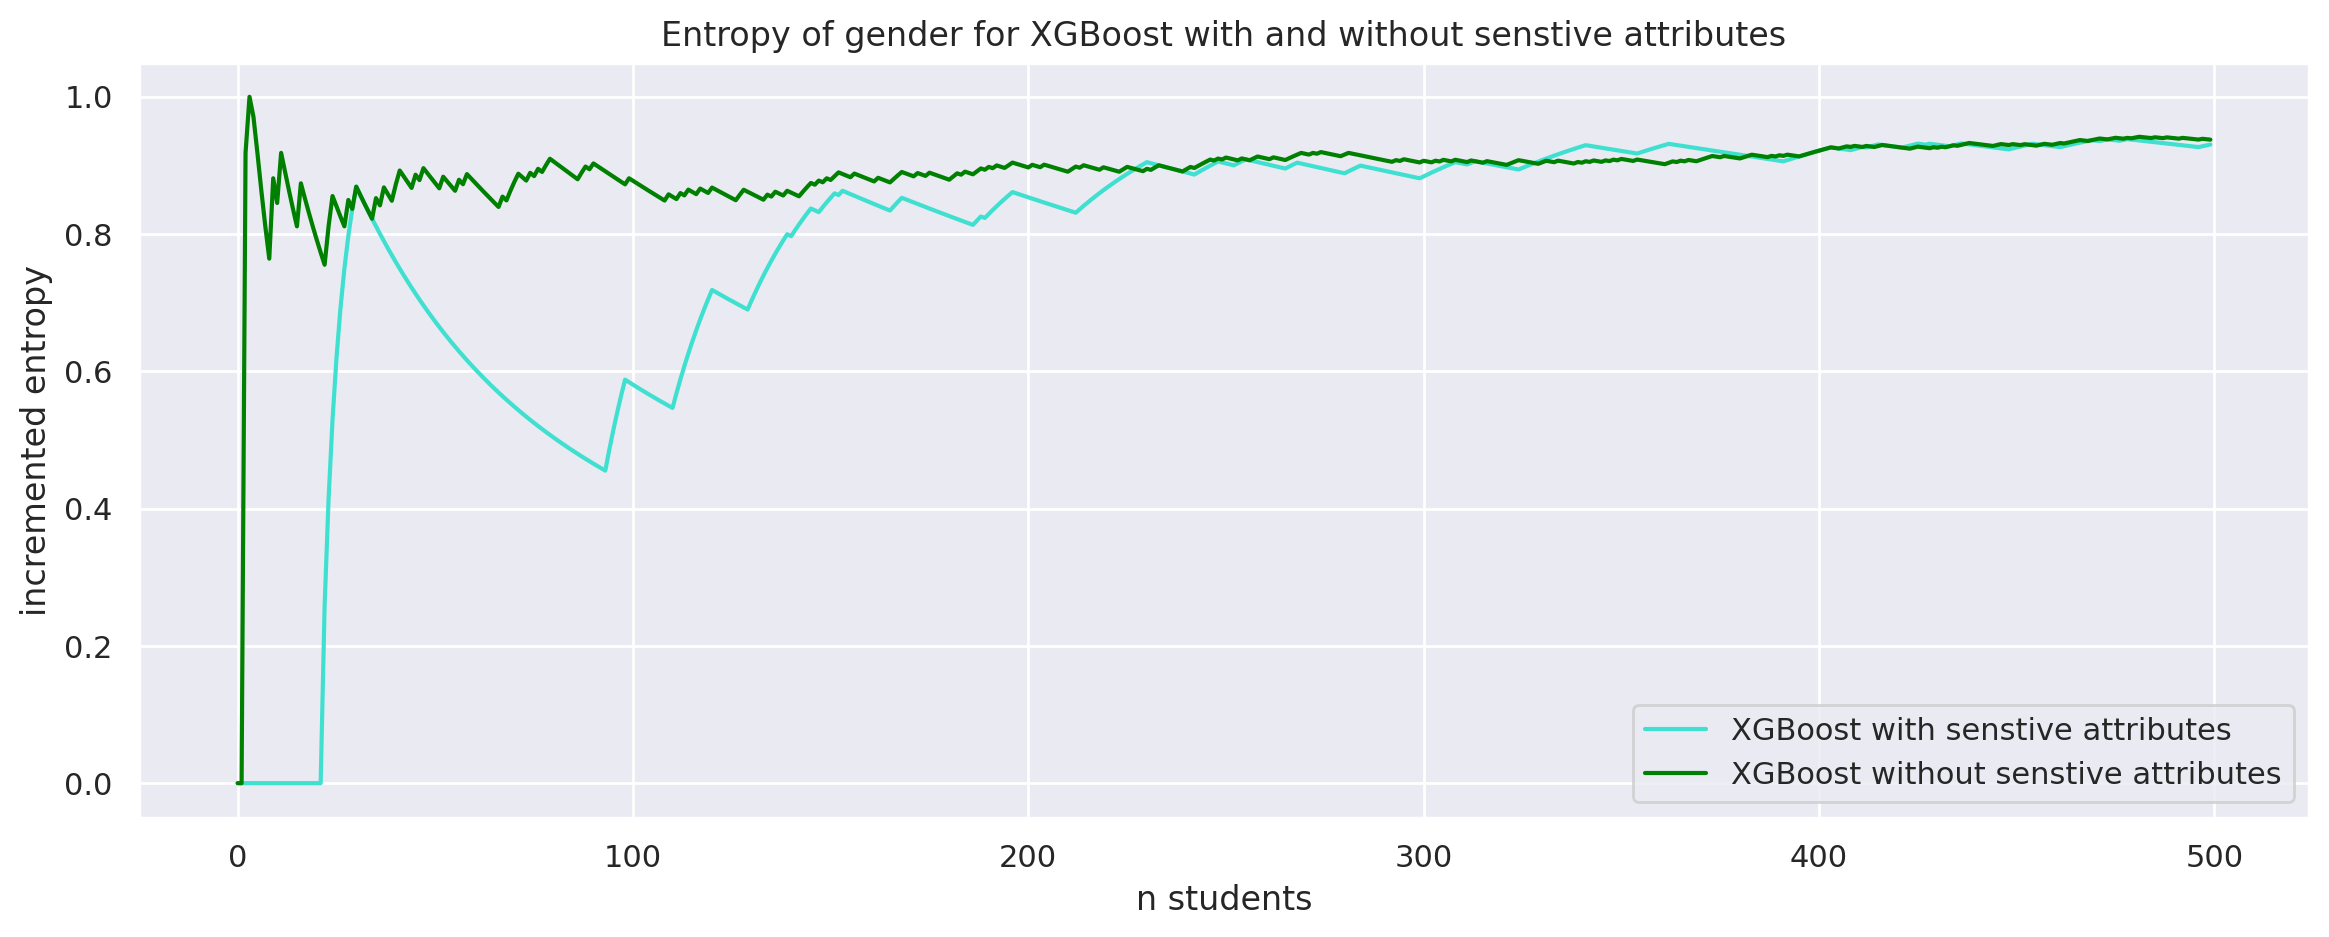

In [88]:
## WITH SENSITIVE ATTRIBUTES

#For each row incremented, get ratio of M and F
data_value_counts_xg_vanilla= []
for i in range(1,len(df_xgb_vanilla)+1):
    data_value_counts_xg_vanilla.append(np.array([df_xgb_vanilla["GENDER_bin"][:i].value_counts(normalize=True)]))

#Create new column with the ratios
df_xgb_vanilla["value_counts_col_GENDER"] = data_value_counts_xg_vanilla

# Check if probabilities look correct
print(df_xgb_vanilla[["value_counts_col_GENDER", "GENDER_bin"]][:5])

#For each row incremented, get entropy 
data_entropy_xgb_vanilla = []
for i in range(len(df_xgb_vanilla)):
    data_entropy_xgb_vanilla.append(-(df_xgb_vanilla["value_counts_col_GENDER"][i]*np.log2(df_xgb_vanilla["value_counts_col_GENDER"][i])).sum())

#Create new column with the entropy
df_xgb_vanilla["entropy_col_GENDER"] = data_entropy_xgb_vanilla



## WITHOUT SENSITIVE ATTRIBUTES

#For each row incremented, get ratio of M and F
data_value_counts_xgb_wo = []
for i in range(1,len(df_xgb_wo)+1):
    data_value_counts_xgb_wo.append(np.array([df_xgb_wo["GENDER_bin"][:i].value_counts(normalize=True)]))

#Create new column with the ratios
df_xgb_wo["value_counts_col_GENDER"] = data_value_counts_xgb_wo

# Check if probabilities look correct
print(df_xgb_wo[["value_counts_col_GENDER", "GENDER_bin"]][:5])

#For each row incremented, get entropy 
data_entropy_xgb_wo = []
for i in range(len(df_xgb_wo)):
    data_entropy_xgb_wo.append(-(df_xgb_wo["value_counts_col_GENDER"][i]*np.log2(df_xgb_wo["value_counts_col_GENDER"][i])).sum())

#Create new column with the entropy
df_xgb_wo["entropy_col_GENDER"] = data_entropy_xgb_wo


## PLOT TOGETHER

#apply new column of cumsum+1
df_xgb_vanilla["n_students"] = range(len(df_xgb_vanilla))
df_xgb_wo["n_students"] = range(len(df_xgb_wo))


# mergesort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_xgb_vanilla[:500], color="turquoise") #with
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_xgb_wo[:500], color="green") #without


plt.title("Entropy of gender for XGBoost with and without senstive attributes")
plt.xlabel('n students')
plt.ylabel('incremented entropy')

plt.legend(["XGBoost with senstive attributes", "XGBoost without senstive attributes"], loc ="lower right")

plt.show()

Inspect the plot by 200

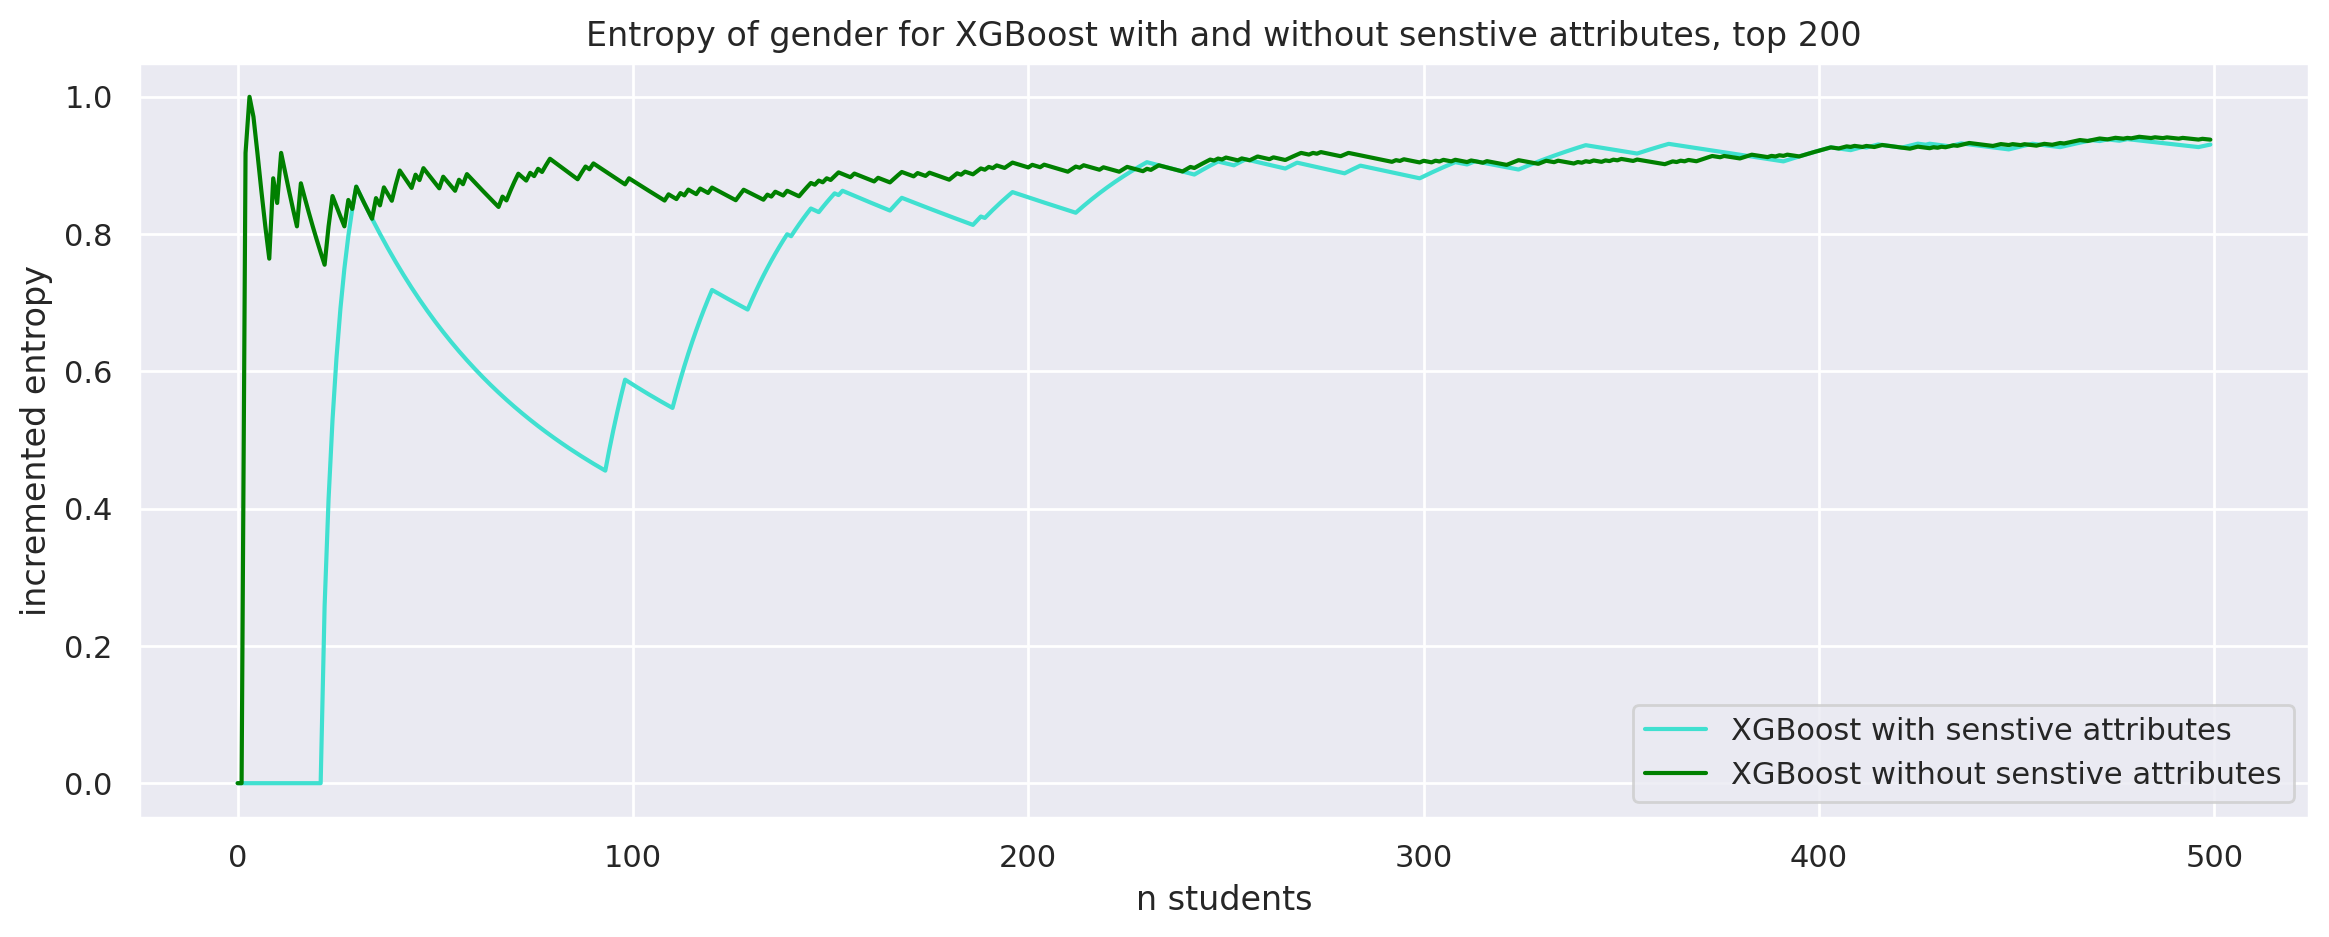

In [89]:
## PLOT TOGETHER, 200

#apply new column of cumsum+1
df_xgb_vanilla["n_students"] = range(len(df_xgb_vanilla))
df_xgb_wo["n_students"] = range(len(df_xgb_wo))


# mergesort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_xgb_vanilla[:500], color="turquoise") #with
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_xgb_wo[:500], color="green") #without



plt.title("Entropy of gender for XGBoost with and without senstive attributes, top 200")
plt.xlabel('n students')
plt.ylabel('incremented entropy')

plt.legend(["XGBoost with senstive attributes", "XGBoost without senstive attributes"], loc ="lower right")

plt.show()